# Final Project - Data Science/Spatial Analysis

## 1. Project Title

Optimal siting of electric vehicle chargers in Tokyo

## 2. Team members

Sohei Yamada (A59004030) <br>
Yuki Imura (A59011525)

## 3. Questions we addressed, why it is important (5pt)

<p>Our overarching question is to find where are the optimal points to locate electric vehicle (EV) chargers in Tokyo. Therefore, we will perform an analysis using geographic information and machine learning to answer the following three questions:</p>

### Question 1: Do existing electric vehicle (EV) chargers have sufficient coverage to promote EVs?

<p>Since EVs require frequent recharging, EV adoption may be delayed in areas with small coverage. We will use data on EV charger locations in Tokyo to analyze the geographical coverage. Esprcially, we will look at rapid chargers because this type of charger is available for public and appropriate for analyzing the coverage.</p>

### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

<p>We hypothesize that EV chargers may be unevenly distributed in higher-income neighborhoods because EVs and EV chargers are expensive. This geographic bias may increase the disproportionate disparity in environmental impacts and health risks by community because gasoline vehicles emit more carbon dioxide, PM2.5 and other toxins than EVs. We will use municipality-level Tokyo metropolitan census data and EV charger location data to determine the relationship between socioeconomic characteristics and EV charger location by municipality-level analysis.</p>

### Question 3:  Where are the optimal places to locate EV charge stations (Places where several chargers are installed so that many EVs can be charged at the same time)?

<p>EV chargers should be located near major roads, gas stations, and shopping centers to improve convenience for drivers, but should not be located where flooding or landslides are expected to avoid safety issues. EV chargers should also not be installed in places where chronic traffic congestion occurs to reduce congestion. Thus, in addition to the important features we will find by answering question 2, we will look at other factors that are not belongs to municipalities. Then, we will propose where EV charge stations should be installed at the targeted municipalities which have low-coverage and low-probability of adding EV chargers, utilizing Japanese administrative and other data.</p>

<p>In light of these analyses, we will find optimal locations for new charging stations in most needed areas in Tokyo. Our analysis would promote EV penetration and contribute to the realization of net zero emissions (related to SDGs 13) efficiently and effectively.</p>


## 4. Background and literature (5pt)

<p>Greenhouse gas reduction has become an issue of global importance. Governments are instituting policies to transition from gasoline-powered vehicles to EVs with lower carbon dioxide emissions. For example, the state of California has decided that all new passenger cars sold in California will be zero-emission vehicles, including EVs, by 2035 (California Air Resources Board, n.d.). The EV penetration rate in California is 9.5%. On the other hand, Japan has also set a policy that all new passenger cars will be electric vehicles by 2035, but the EV penetration rate in 2021 is less than 1% (Momota, 2022). One of the reasons for the slow spread of EVs in Japan is the slow development of charging infrastructure. The number of EV charging facilities in Japan has remained at about 30,000 from 2018 to 2022, while governmental target is over 150,000 (Ministry of Economy, Trade and Industry, Japan, 2022). It is necessary to increase the number of EVs by installing charging facilities in optimal locations to popularize EVs in Japan.</p>

<p>Bayram et al. (2022) studied where to place fast chargers among existing gas stations to achieve the maximum coverage with the minimum number (Maximum coverage location problem). Their analysis did not include Tokyo, so we will conduct it and go farther by analyzing other factors of determining charger locations.</p>

<p>Oda et al. (2017) studied the effect of increasing an additional EV charging unit to existing stations in Japan. Their found that adding one more unit to stations which has only one unit will reduce waiting time for drivers and cost-effective. We agree this result and try to find where we should allocate one more unit by machine learning method.</p>

<p>Erbaş et al. (2018) evaluated the suitability of existing EV charger locations in Ankara by setting 15 criteria for environmental, economic, and urbanity (multiple-criteria decision analysis), and proposed optimal placement of EV chargers in the study area. A map of the entire study area was created scoring the 15 criteria, and it was concluded that the location with the highest score was the best location for the EV chargers. We aplied their concept of using multiple criteria to Tokyo, Japan by conducting multiple analyses.</p>

<p>In addition, Xu et al. (2013) proposed a solution for the placement of chargers such that the operating distance is minimized (Minimum total transportation distance). However, this is a mathematical solution, not a geo-informed solution. Our machine learning usage can contribute to this problem solving reasonably.</p>

<p>Therefore, we propose the optimal siting of EV chaegers in Tokyo by analyzing the current installation status of EV chargers and using administrative data such as road conditions and population in Tokyo.</p>

## 5. Python packages you used and why (5pt)

<p>We used the following libraries to perform our analysis:</p>

### (a) Pandas library

<p>Necessary to manipulate dataframes</p>

In [1]:
import pandas as pd

### (b) GeoPandas library

<p>Necessary to manipulate geospatial dataframes</p>

In [2]:
import geopandas as gpd

### (c) ArcGIS library

<p>Necessary to maximize coverage and minimize facilities</p>

In [195]:
import warnings
warnings.filterwarnings("ignore")

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.geoenrichment import *
from arcgis.features import GeoAccessor, FeatureLayer, Feature, FeatureSet, FeatureCollection, find_locations
import arcgis.network as network

gis = GIS("https://ucsdonline.maps.arcgis.com/home/", client_id='xH567LTL8jqxk6wx')
#gis = GIS(username="gpec447sp23_15")

token = gis._con.token

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=xH567LTL8jqxk6wx&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=iqLJx3Av0JafcHU5U59jZi5ISV2B2W&allow_verification=false
Enter code obtained on signing in using SAML: ········


### (d) Shapely library

<p>Necessary to depict graphs</p>

In [4]:
from shapely.geometry import Point

### (e) seaborn library

<p>Necessary to visualize statistical data</p>

In [5]:
import seaborn as sns

### (f) scikit-learn library

<p>Necessary to perform machine learning.</p>

In [6]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor, FeatureLayerCollection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

### (g) NumPy library

<p>Necessary to perform calcupation efficiently.</p>

In [7]:
import numpy as np

### (h) requests library

<p>Necessary to make it easy to manipulate HTTP requests.</p>

In [8]:
import requests

### (i) urllib library

<p>Necessary to make it easy to manipulate URL requests.</p></p>

In [9]:
import urllib

### (j) tqdm library

<p>Necessary to create a smart progress bar for the loops</p>

In [10]:
import tqdm

### (k) datetime library

<p>Necessary for date and time manipulation.</p>

In [11]:
from datetime import datetime

### (l) GeoPy library

<p>Necessary for geocoder for OpenStreetMap data.</p>

In [12]:
from geopy.geocoders import Nominatim

### (m) IPython library

<p>Necessary to use an interactive command-line terminal for Python</p>

In [13]:
from IPython.display import display

### (n) Folium library

<p>Necessary to make a folium map</p>

In [14]:
import folium
from folium.plugins import HeatMap

### (o) Statsmodels library

<p>Necessary to run simple regression map</p>

In [15]:
import statsmodels.api as statmodels

<center><b>Table 1: Libraries we use by question</b></center>

<table>
    <tr>
        <th></th>
        <th>(a)</th>
        <th>(b)</th>
        <th>(c)</th>
        <th>(d)</th>
        <th>(e)</th>
        <th>(f)</th>
        <th>(g)</th>
        <th>(h)</th>
        <th>(i)</th>
        <th>(j)</th>
        <th>(k)</th>
        <th>(l)</th>
        <th>(m)</th>
        <th>(n)</th>
        <th>(o)</th>
    </tr>
    <tr>
        <th>Question 1: Coverage</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <th>Question 2: Socio-ecomonic ML</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
    </tr>
    <tr>
        <th>Question 3: Optimal location-allocation</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
    </tr>
</table>

## 6. Data sources (10pt)

### Inputs and outputs

<p>This code requires the following input files and outpus the following files. These files are located in the following directry:</p>

In [16]:
path = "https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/" 

#### Input files

<center><b>Table 2: List of inputs of this code</b></center>

<table>
    <tr>
        <th>File name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>EVC_location.csv</td>
        <td>EV charger location data thoroughout Japan, which includes the name and physical address of locations in Japanese language and the number of chargers.</td>
    </tr>
    <tr>
        <td>h02_13.csv</td>
        <td>Town (One level lower than the city-level) names and population data in Tokyo.</td>
    </tr>
    <tr>
        <td>X_tokyo_enhance.csv</td>
        <td>City names and their social data including populations and monthly expenditures of 23 cities in Tokyo, collected from Tokyo Metropolitan Government and Japanese government.</td>
    </tr>
</table>

#### Output files

<center><b>Table 3: List of outputs of this code</b></center>

<table>
    <tr>
        <th>File name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>EVC_loc_tokyo</td>
        <td>EV charger location data thoroughout Tokyo, which includes longitudes, latitudes and the number of chargers.</td>
    </tr>
    <tr>
        <td>tract_tokyo.csv</td>
        <td>Longitude, latitude and population data for each town in Tokyo.</td>
    </tr>
</table>





### EV charger location data

<p>For our analysis, we needed data on the location of EV chargers. We used the list of EV charge stations published by e-Mobility Power Co. (n.d.). This data is in CSV format, with one row per station. The columns include the station's Japanese name, address, number of rapid chargers and regular chargers.</p>

<p><a href="https://usr.evcharger-net.com/chargestationlist/pubsite/chgstationlist/" tagrget="_blank">https://usr.evcharger-net.com/chargestationlist/pubsite/chgstationlist/</a></p>

### Tract data

<p>To analyze the optimal siting of EV chrgers, it is necessary to establish the location and quantity of their demand. We obtained population data for each town (One level lower than the city-level) from e-stat, a Japanese government portal.</p>

<p><a href="https://www.e-stat.go.jp/stat-search/files?page=1&query=%E7%94%BA%E4%B8%81%E3%80%80%E4%BA%BA%E5%8F%A3%E3%80%80%E6%9D%B1%E4%BA%AC%E9%83%BD&layout=dataset&stat_infid=000032163274&metadata=1&data=1" tagrget="_blank">https://www.e-stat.go.jp/stat-search/files?page=1&query=%E7%94%BA%E4%B8%81%E3%80%80%E4%BA%BA%E5%8F%A3%E3%80%80%E6%9D%B1%E4%BA%AC%E9%83%BD&layout=dataset&stat_infid=000032163274&metadata=1&data=1</a></p>

## 7. Data cleaning we have done (10pt)

### Data cleaning for EV charger location data

<p>The location information of the acquired EV charger location is written in Japanese address. Therefore, it is necessary to convert the Japanese address into latitude and longitude to map the coverage of the EV charger. We used the API of the Ministry of Land, Infrastructure, Transport and Tourism (MLIT) to convert the information to latitude and longitude, and saved it as a CSV file.</p>

In [17]:
## Load EV charger location data
#EVC_loc = pd.read_csv(path+'EVC_location.csv', encoding='cp932')
#
## Choose locations in Tokyo
#EVC_loc_tokyo = EVC_loc[EVC_loc['所在地'].str.contains("東京都")]
#EVC_loc_tokyo = EVC_loc_tokyo[['設置場所名称','所在地','急速充電器基数','普通充電器基数','施設カテゴリー']]
#EVC_loc_tokyo_address = EVC_loc_tokyo['所在地']
#
## Add lon/lat
#lonlat = []
#makeUrl = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="
#for x in tqdm.tqdm(EVC_loc_tokyo_address):
#    try:
#        address = x
#        s_quote = urllib.parse.quote(address)
#        response = requests.get(makeUrl + s_quote)
#        lonlat.append(response.json()[0]["geometry"]["coordinates"])
#    except:
#        lonlat.append('')
#
#EVC_loc_tokyo['lonlat'] = lonlat
#
#EVC_loc_tokyo = EVC_loc_tokyo.rename(columns={"設置場所名称": "name", "所在地": "address", "急速充電器基数": "EVC_rapid", 
#                                              "普通充電器基数": "EVC_regular", "施設カテゴリー": "category"})

<p>For numerical manipulation, we converted the data type from string to float for the number of rapid and regular EV chargers.</p>

In [18]:
#EVC_loc_tokyo['EVC_rapid'] = EVC_loc_tokyo['EVC_rapid'].astype('float')
#EVC_loc_tokyo['EVC_regular'] = EVC_loc_tokyo['EVC_regular'].astype('float')
#EVC_loc_tokyo.to_csv(path+'EVC_loc_tokyo.csv')
#EVC_loc_tokyo

### Data cleaning for census data

<p>Since every census data is only available in CSV file, we downloaded them separately and merge them by hand. We only include merged file in zip because of significant format difference by each census and avoiding errors caused by japanese characters. Also, it is worth noting that these CSV files are only accessible by Japanese VPN. Then, we convert column data type to float64 in order to scale each variable appropriately.</p>

### Data cleaning for tract data

<p>In order to calculate the optimal locations for EV chargers, it is necessary to input the potential demend for each tract in Tokyo. For this purpose, a dataset of population and latitude/longitude information per tract was created.</p>

In [19]:
#tract = pd.read_csv(path+'h02_13.csv', encoding='cp932')
#
#tract_tokyo = tract
#tract_tokyo_address = tract['address']
#
## Add lon/lat
#lon = []
#lat = []
#geolocator = Nominatim(user_agent="user")
#
#for x in tqdm.tqdm(tract_tokyo_address):
#    try:
#        location = geolocator.geocode(x)
#        lon.append(location.longitude)
#        lat.append(location.latitude)
#    except:
#        lon.append('')
#        lat.append('')
#
#tract_tokyo['lon'] = lon
#tract_tokyo['lat'] = lat
#
#tract_tokyo.to_csv(path+'tract_tokyo.csv')
#display(tract_tokyo)

## 8. Descriptive statistics for the data (10pt)

To begin with, we import the EV charger locations and plot a map to see the geographical correlation. Especially, we will look at rapid EV chargers as Oda et al. did.

In [20]:
# Import EV charger data
EVC_loc_tokyo = pd.read_csv(path+'EVC_loc_tokyo.csv')
EVC_loc_tokyo 

,Unnamed: 0,name,address,EVC_rapid,EVC_regular,category,lonlat
0,3849,九段会館テラス,東京都千代田区九段南１－６ー５,1,0,その他,"[139.751511, 35.69471]"
1,3850,ヨドバシカメラマルチメディアＡｋｉｂａ,東京都千代田区神田花岡町１－１,1,0,大規模小売店舗,"[139.774612, 35.698639]"
2,3851,ＯＴＥＭＡＣＨＩ ＯＮＥ,東京都千代田区大手町一丁目２番１号,3,0,その他,"[139.76265, 35.687737]"
3,3852,ホテルニューオータニ東京,東京都千代田区紀尾井町４－１,2,0,宿泊施設,"[139.734283, 35.680435]"
4,3853,丸の内中央パーキング,東京都千代田区丸の内２－４－１,0,24,大規模小売店舗,"[139.763794, 35.681046]"
...,...,...,...,...,...,...,...
342,4191,モビリティ東京 北小岩店,東京都江戸川区北小岩３－１４－１２,0,1,自動車ディーラー,"[139.892471, 35.736629]"
343,4192,モビリティ東京 葛西店,東京都江戸川区中葛西５－７－１３,0,1,自動車ディーラー,"[139.865585, 35.661617]"
344,4193,モビリティ東京 江戸川西一之江店,東京都江戸川区西一之江１－８－９,0,1,自動車ディーラー,"[139.87738, 35.702717]"
345,4194,モビリティ東京 一之江店,東京都江戸川区一之江７－６６－２５,1,1,自動車ディーラー,"[139.877563, 35.683121]"


In [21]:
# Create a new column to store the geometry information
EVC_loc_tokyo['geometry'] = EVC_loc_tokyo['lonlat'].apply(lambda x: Point(float(x.replace('[', '').replace(']', '').split(',')[0].strip()), float(x.replace('[', '').replace(']', '').split(',')[1].strip())))

# Convert DataFrame to GeoDataFrame
EVC_loc_tokyo = gpd.GeoDataFrame(EVC_loc_tokyo, geometry='geometry')

In [22]:
# Create the base map
tokyo_map_0 = folium.Map(location=[35.6695, 139.6017], zoom_start=10, tiles='Stamen Terrain')

# Create a list of latitudes, longitudes, and EVC_rapid values
evc_data = [[row['geometry'].y, row['geometry'].x, row['EVC_rapid']] for idx, row in EVC_loc_tokyo.iterrows()]

# Add the HeatMap layer to the map
heatmap = HeatMap(evc_data, min_opacity=0.5, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})
heatmap.add_to(tokyo_map_0)

# Display the map
tokyo_map_0

It looks rapid EV chargers are located a lot. But, this map includes slow charging station. So, we exclude these and see the geographical relationship of rapid chargers.

In [23]:
# Make subset of rapid EVCs > 1
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=1]
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo_subset_1.reset_index(drop=True)

In [24]:
# Import boundary data for aggregating by municipalities and cities
serviceURL = "https://services.arcgis.com/wlVTGRSYTzAbjjiC/arcgis/rest/services/全国市区町村界データ2022/FeatureServer"
item = FeatureLayerCollection(serviceURL, gis=gis)
muni = pd.DataFrame.spatial.from_layer(item.layers[0]) # Included all boundary data in Japan

In [25]:
# Clean the JCODE column
muni["JCODE"] = muni["JCODE"].str.strip()  # Remove leading and trailing whitespaces
muni["JCODE"] = pd.to_numeric(muni["JCODE"], errors="coerce")  # Convert non-numeric values to NaN

# Filter the municipalities & City in Tokyo (JCODE=13101~13123, 13124~13229)
tokyo_muni = muni[muni["JCODE"].between(13101, 13229)]

# Set geometory and CRS
EVC_loc_tokyo_subset_1['lonlat'] = EVC_loc_tokyo_subset_1['lonlat'].str.replace(r'[][]', '', regex=True)

EVC_loc_tokyo_subset_1['lon'] = EVC_loc_tokyo_subset_1['lonlat'].str.split(',').str[0]
EVC_loc_tokyo_subset_1['lat'] = EVC_loc_tokyo_subset_1['lonlat'].str.split(',').str[1]

EVC_loc_tokyo_subset_1 = gpd.GeoDataFrame(
    EVC_loc_tokyo_subset_1, geometry=gpd.points_from_xy(EVC_loc_tokyo_subset_1.lon, EVC_loc_tokyo_subset_1.lat))
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo_subset_1.set_geometry('geometry')

tokyo_muni = tokyo_muni.set_geometry('SHAPE', crs='EPSG:4326')

# Merge boundary data with EVC data
muni_EVC = gpd.sjoin(tokyo_muni, EVC_loc_tokyo_subset_1, op='intersects')

In [26]:
# Aggregate the rapid charger amount by boundaries
muni_EVC['SHAPE'] = muni_EVC['SHAPE'].buffer(0)
dissolved_muni_EVC = muni_EVC.dissolve(by='CITY_ENG', aggfunc='sum')

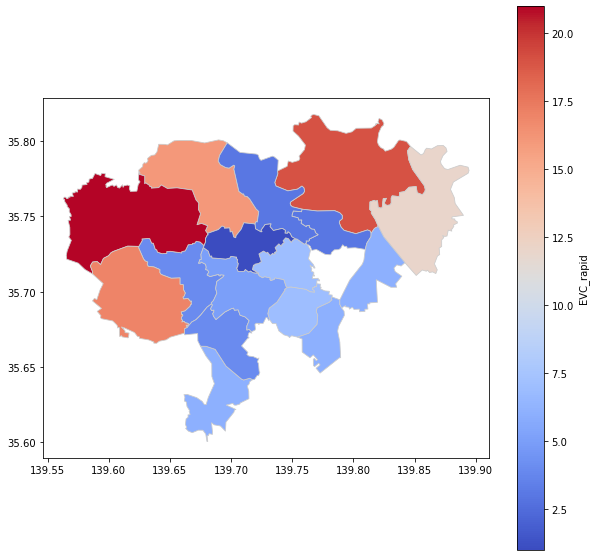

In [27]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Heat map and Histgral of rapid EV charger units
fig, ax = plt.subplots(figsize=(10, 10))
dissolved_muni_EVC.plot(column='EVC_rapid', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
sm = ScalarMappable(norm=Normalize(vmin=dissolved_muni_EVC['EVC_rapid'].min(), vmax=dissolved_muni_EVC['EVC_rapid'].max()), cmap='coolwarm')
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('EVC_rapid')

plt.show()

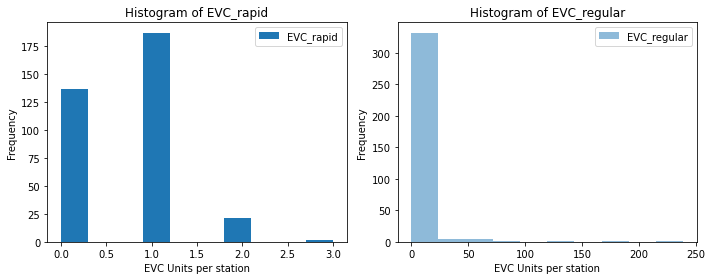

In [28]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Define the bin edges for the histograms
bins = 10

# Plot the histogram for EVC_rapid in the left plot
ax1.hist(EVC_loc_tokyo['EVC_rapid'], bins=bins, alpha=1, label='EVC_rapid')

# Set the labels and title for the left plot
ax1.set_xlabel('EVC Units per station')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of EVC_rapid')

# Plot the histogram for EVC_regular in the right plot
ax2.hist(EVC_loc_tokyo['EVC_regular'], bins=bins, alpha=0.5, label='EVC_regular')

# Set the labels and title for the right plot
ax2.set_xlabel('EVC Units per station')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of EVC_regular')

# Add legends for both plots
ax1.legend()
ax2.legend()

# Adjust spacing between the plots
plt.tight_layout()



Interestingly, the map and histogram show that there is no significant geographical autocorrelation of rapid EV charger units. On the other hand, in terms of understanding the important features of locating EV chargers, Hachioji city may bias our machine learning model because it is outliers. Also, we can see most rapid EVC stations have just one unit and no more than 3 units are located. 

Next section, we will analyze rapid EVCs by driving distance, feature analysis, optimal location allocation.

## 9. Analysis (25pt)

### Question 1: Do existing EV chargers have sufficient coverage to promote EVs?

<p>First, we map locations within a 10-minute drive from points in Tokyo where <u>at least one rapid chargers</u> are installed.</p>

In [124]:
service_area_url = gis.properties.helperServices.serviceArea.url
sa_layer = network.ServiceAreaLayer(service_area_url, gis=gis)

In [125]:
sa_results = []
times = [datetime(2022, 4, 6, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_1))):
    facilities = EVC_loc_tokyo_subset_1.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 210/210 [00:38<00:00,  5.46it/s]


In [31]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [32]:
tokyo_map_1 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_1.basemap = 'arcgis-topographic'
tokyo_map_1

MapView(layout=Layout(height='400px', width='100%'))

In [33]:
# Add Tokyo boundary
pref_boundary_item = gis.content.get('c145e30920e04b59928079c39a2f7fcd')
pref_boundary_layer = pref_boundary_item.layers[0].query(where='JCODE>= 13101 and JCODE<=13123').sdf
tokyo_map_1.add_layer(pref_boundary_layer)

In [34]:
tokyo_map_1.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_1.draw(fset)

100%|██████████| 210/210 [00:33<00:00,  6.20it/s]


<p>The map above shows that most of Tokyo area is covered already. However, a single rapid charger cannot charge multiple EVs at the same time, indicating this coverage is not practical. Therefore, we next map locations within a 10-minute drive from where <u>two or more rapid chargers</u> are installed and see if there is any difference.</p>

In [35]:
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=2]
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo_subset_2.reset_index(drop=True)

sa_results = []
times = [datetime(2022, 4, 6, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_2))):
    facilities = EVC_loc_tokyo_subset_2.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 23/23 [00:03<00:00,  5.76it/s]


In [36]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [37]:
tokyo_map_2 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_2.basemap = 'arcgis-topographic'
tokyo_map_2

MapView(layout=Layout(height='400px', width='100%'))

In [38]:
tokyo_map_2.add_layer(pref_boundary_layer)

In [39]:
tokyo_map_2.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_2.draw(fset)

100%|██████████| 23/23 [00:00<00:00, 31.50it/s]


Now, we can confirm that EVCs with two or more units are too few and their coverage is obviously not enough. Even Hachioji city has no coverage. Given the findings that only one unit of EVC can cause inconvinience to drivers by Oda et al. (2017), spreading this 2-or-more covorages will incentivize people to buy EVs.

One way to tackle this problem is to allocate one more unit to only-one-unit stations. Therefore, we will try to solve the location allocation problem by maximizing market share method later. However, understanding the demand of EVCs is not as easy as said. More importantly, the only data at hand that is more granular than municipal data is population data. Thus, we will analyze the important feature of EVC allocation now in Tokyo and make a weighted index from population data and the important features.

### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

<p>Secondly, we will do socio-economic analysis by using random forest regressions. The first step is to import the municipality level boundary data.</p>

In [40]:
# Import cleaned X variable data for municipalities
X_tokyo = pd.read_csv(path+"X_tokyo_enhance.csv", nrows=23) # Only municipalities
X_tokyo

,CITY_ENG,Municipality,car_owner,parking,total_pop,net_inflow_pop,foreign_pop,net_migration,hh_member,assisted,...,road_area,employee,avg_age,total_income_pop,300_pop,300_500_pop,500_700_pop,700_1000_pop,1000_1500_pop,_1500_pop
0,Chiyoda-ku,1,"31,715","18,349","66,680","794,656","2,814",387,1.79,577,...,"2,787,768","31,065",42.7,"35,220","6,830","6,770","5,170","4,610","4,250","5,030"
1,Chuo-ku,1,"42,283","16,848","169,179","467,419","8,062",301,1.82,"1,029",...,"3,047,548","35,745",42.3,"90,360","16,690","20,280","14,510","13,540","12,480","7,960"
2,Minato-ku,1,"77,078","22,934","260,486","697,492","16,929",282,1.77,"1,727",...,"4,448,059","37,116",42.9,"136,930","26,540","32,710","17,250","15,110","15,020","11,950"
3,Shinjuku-ku,1,"51,356","15,880","349,385","441,988","33,907","1,558",1.55,"8,908",...,"3,415,571","32,274",43.9,"213,510","61,240","44,840","21,910","18,300","12,250","6,690"
4,Bunkyo-ku,1,"31,344","3,411","240,069","126,408","9,746",711,1.77,"1,921",...,"1,955,589","13,018",43.3,"125,450","30,920","28,750","16,100","16,040","12,590","9,520"
5,Taito-ku,1,"32,515","4,030","211,444","105,857","13,896",427,1.70,"7,611",...,"2,626,920","22,770",46.1,"115,660","28,480","29,740","18,730","13,980","7,900","2,880"
6,Sumida-ku,1,"47,078","5,082","272,085","22,907","11,892",834,1.85,"6,381",...,"2,958,672","15,492",45.2,"137,180","37,320","39,560","20,220","16,860","9,200","2,680"
7,Koto-ku,1,"111,696","34,325","524,310","110,425","29,275",584,1.97,"7,684",...,"5,755,680","18,024",44.0,"253,970","70,950","61,220","37,740","35,950","23,060","9,340"
8,Shinagawa-ku,1,"69,840","10,961","422,488","157,167","12,538",-678,1.77,"4,561",...,"4,030,594","20,123",44.2,"218,230","54,550","52,150","32,850","26,870","19,590","8,350"
9,Meguro-ku,1,"52,721","2,172","288,088","16,209","8,794",-835,1.84,"2,400",...,"2,319,238","11,389",43.9,"146,760","33,660","35,650","18,760","16,570","13,190","8,990"


In [41]:
X_tokyo.iloc[:, 1:25] = X_tokyo.iloc[:, 1:25] .replace(',', '', regex=True).astype(float)

# Population weighting for population-driven data
X_tokyo["car_owner"] = X_tokyo["car_owner"]/X_tokyo["total_pop"]
X_tokyo["parking"] = X_tokyo["parking"]/X_tokyo["total_pop"]
X_tokyo["net_inflow_pop"] = X_tokyo["net_inflow_pop"]/X_tokyo["total_pop"]
X_tokyo["foreign_pop"] = X_tokyo["foreign_pop"]/X_tokyo["total_pop"]
X_tokyo["net_migration"] = X_tokyo["net_migration"]/X_tokyo["total_pop"]
X_tokyo["assisted"] = X_tokyo["assisted"]/X_tokyo["total_pop"]

# Land area weighting for land-use data
X_tokyo["land_house"] = X_tokyo["land_house"]/X_tokyo["land_total"]
X_tokyo["land_farm"] = X_tokyo["land_farm"]/X_tokyo["land_total"]
X_tokyo["land_unused"] = X_tokyo["land_unused"]/X_tokyo["land_total"]
X_tokyo["road_length"] = X_tokyo["road_length"]/X_tokyo["land_total"]
X_tokyo["road_area"] = X_tokyo["road_area"]/X_tokyo["land_total"]

# Income population weighting for income range population data
X_tokyo["300_pop"] = X_tokyo["300_pop"]/X_tokyo["total_income_pop"]
X_tokyo["300_500_pop"] = X_tokyo["300_500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["500_700_pop"] = X_tokyo["500_700_pop"]/X_tokyo["total_income_pop"]
X_tokyo["700_1000_pop"] = X_tokyo["700_1000_pop"]/X_tokyo["total_income_pop"]
X_tokyo["1000_1500_pop"] = X_tokyo["1000_1500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["_1500_pop"] = X_tokyo["_1500_pop"]/X_tokyo["total_income_pop"]

In [42]:
# Merge it to dataset with y variable
grouped_EVC = muni_EVC.groupby('CITY_ENG')['EVC_rapid'].sum() # y variable
dataset = X_tokyo.merge(grouped_EVC, on='CITY_ENG', how='left')
dataset['EVC_rapid'] = dataset['EVC_rapid'].fillna(0)

# Population weighting for y variable
dataset['EVC_rapid'] = dataset['EVC_rapid'] /dataset["total_pop"]

# Delete unnecessary columns
dataset = dataset.drop(columns=["CITY_ENG", "total_pop", "land_total", "total_income_pop"])
display(dataset.isnull().sum(), dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Municipality    23 non-null     float64
 1   car_owner       23 non-null     float64
 2   parking         23 non-null     float64
 3   net_inflow_pop  23 non-null     float64
 4   foreign_pop     23 non-null     float64
 5   net_migration   23 non-null     float64
 6   hh_member       23 non-null     float64
 7   assisted        23 non-null     float64
 8   land_house      23 non-null     float64
 9   land_farm       23 non-null     float64
 10  land_unused     23 non-null     float64
 11  road_length     23 non-null     float64
 12  road_area       23 non-null     float64
 13  employee        23 non-null     float64
 14  avg_age         23 non-null     float64
 15  300_pop         23 non-null     float64
 16  300_500_pop     23 non-null     float64
 17  500_700_pop     23 non-null     float

Municipality      0
car_owner         0
parking           0
net_inflow_pop    0
foreign_pop       0
net_migration     0
hh_member         0
assisted          0
land_house        0
land_farm         0
land_unused       0
road_length       0
road_area         0
employee          0
avg_age           0
300_pop           0
300_500_pop       0
500_700_pop       0
700_1000_pop      0
1000_1500_pop     0
_1500_pop         0
EVC_rapid         0
dtype: int64

None

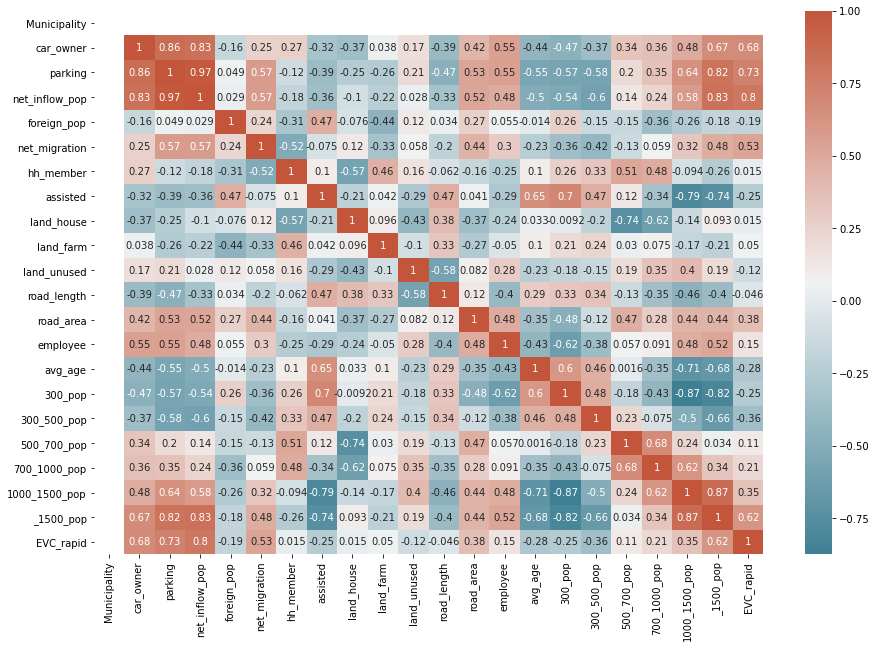

In [43]:
# Making a correlation heatmap & a pairwise plot

corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.show()

In [44]:
# Drop highly correlated variables to avoid multi-collinearity
drop_columns = ["net_inflow_pop", "parking" ,"1000_1500_pop"]
dataset_reg = dataset.drop(columns=drop_columns)

# Make lables
labels = ["Municipality", "car_owner", 'foreign_pop', 'net_migration', 'hh_member',"assisted", "land_house",'land_farm','land_unused', 'road_length', "road_area", 'employee', "avg_age", "300_pop", "300_500_pop", "500_700_pop", "700_1000_pop", "_1500_pop"]

# Define the dependent variable (y) and independent variables (X)
y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis=1)

# Add a constant column to X for the intercept term
X = statmodels.add_constant(X)

# Fit the OLS model
model = statmodels.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              EVC_rapid   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3.398
Date:                Thu, 01 Jun 2023   Prob (F-statistic):             0.0905
Time:                        21:10:33   Log-Likelihood:                 243.12
No. Observations:                  23   AIC:                            -450.2
Df Residuals:                       5   BIC:                            -429.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Municipality     -0.0004      0.000     -0.812

ADD COMMENT LATER

### Question 3: Where are the optimal places to locate EV charge stations?

To begin with, we define our target stations, which are one-unit stations.

In [235]:
facilities = EVC_loc_tokyo_subset_1[EVC_loc_tokyo_subset_1['EVC_rapid']==1]
EVC_loc_tokyo_subset_3 = facilities
facilities["EVC_rapid"].max()

1

In [236]:
facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 187 entries, 0 to 209
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   187 non-null    int64   
 1   name         187 non-null    object  
 2   address      187 non-null    object  
 3   EVC_rapid    187 non-null    int64   
 4   EVC_regular  187 non-null    int64   
 5   category     187 non-null    object  
 6   lonlat       187 non-null    object  
 7   geometry     187 non-null    geometry
 8   lon          187 non-null    object  
 9   lat          187 non-null    object  
dtypes: geometry(1), int64(3), object(6)
memory usage: 16.1+ KB


In [237]:
tract = pd.read_csv(path+'tract_tokyo.csv', encoding='UTF-8')
tract = tract[['pop','lon','lat']]

demand = tract.dropna(how='any').reset_index(drop=True)

demand_points = gpd.GeoDataFrame()
demand_points['geometry'] = None
display(demand.lon)

demand = gpd.GeoDataFrame(
    demand, geometry=gpd.points_from_xy(demand.lon, demand.lat))
demand_points['geometry'] = demand['geometry']

demand_points = demand_points.set_geometry('geometry')

0      139.762136
1      139.745124
2      139.746306
3      139.743401
4      139.740097
5      139.738897
6      139.734950
7      139.741509
8      139.752738
9      139.751639
10     139.745694
11     139.750657
12     139.743635
13     139.757346
14     139.759073
15     139.754043
16     139.754414
17     139.759508
18     139.764149
19     139.761875
20     139.763475
21     139.765648
22     139.767479
23     139.767523
24     139.769189
25     139.767627
26     139.771365
27     139.770849
28     139.771966
29     139.770699
30     139.774104
31     139.773897
32     139.773421
33     139.774406
34     139.775318
35     139.774244
36     139.773652
37     139.774646
38     139.774990
39     139.780035
40     139.777907
41     139.778083
42     139.775653
43     139.775293
44     139.777798
45     139.774037
46     139.736126
47     139.743591
48     139.737847
49     139.733989
50     139.733399
51     139.778796
52     139.770041
53     139.765299
54     139.787532
55     139

In [238]:
weighting_muni = dissolved_muni_EVC.merge(X_tokyo, on='CITY_ENG', how='left')
demand['row_num'] = range(len(demand))
weighting_muni['row_num'] = range(len(weighting_muni))
demand = gpd.sjoin(demand, weighting_muni, how='inner', op='within', lsuffix='_demand', rsuffix='_weighting')

# Weight demand by the percentage of affluent residents
demand['affluent'] = demand['300_pop']

In [225]:
demand

,pop,lon,lat,geometry,row_num__demand,index__weighting,CITY_ENG,FID,JCODE,P_NUM,...,avg_age,total_income_pop,300_pop,300_500_pop,500_700_pop,700_1000_pop,1000_1500_pop,_1500_pop,row_num__weighting,affluent
0,18.0,139.762136,35.675969,POINT (139.76214 35.67597),0,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
1,12.0,139.745124,35.672078,POINT (139.74512 35.67208),1,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
2,574.0,139.746306,35.675895,POINT (139.74631 35.67589),2,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
3,425.0,139.743401,35.681312,POINT (139.74340 35.68131),3,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
4,1948.0,139.740097,35.680969,POINT (139.74010 35.68097),4,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
5,2634.0,139.738897,35.684297,POINT (139.73890 35.68430),5,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
6,514.0,139.734950,35.681411,POINT (139.73495 35.68141),6,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
7,3965.0,139.741509,35.687350,POINT (139.74151 35.68735),7,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
8,97.0,139.752738,35.685403,POINT (139.75274 35.68540),8,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924
9,719.0,139.751639,35.691555,POINT (139.75164 35.69156),9,3,Chiyoda-ku,2648,52404.0,268864,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.193924


In [239]:
demand_points['weight'] = demand['affluent']
demand_points = demand_points.dropna()
demand_points.info() # Point reduced because some points are not inside the boundaries we look at.

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 554 entries, 0 to 792
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  554 non-null    geometry
 1   weight    554 non-null    float64 
dtypes: float64(1), geometry(1)
memory usage: 13.0 KB


In [240]:
facilities_sedf = GeoAccessor.from_geodataframe(facilities, column_name="geometry")
facilities=facilities_sedf.spatial.to_featureset()

demand_points_sedf = GeoAccessor.from_geodataframe(demand_points, column_name="geometry")
demand_points = demand_points_sedf.spatial.to_featureset()

Since only-one unit EVCs are 1024, we target 100 stations to add one more unit to archieve multiple charger stations.

In [241]:
# Run location allocation 
result = network.analysis.solve_location_allocation(    problem_type='Maximize Coverage', 
                                                        facilities=facilities, 
                                                        demand_points=demand_points,
                                                        number_of_facilities_to_find=23,
                                                        measurement_transformation_model="Linear",
                                                        #measurement_transformation_factor=2,
                                                        travel_direction='Demand to Facility',
                                                        impedance="Drive Time",
                                                        measurement_units='Minutes', 
                                                        default_measurement_cutoff=10
                                                    )

print('Solve succeeded? {}'.format(result.solve_succeeded))

Solve succeeded? True


In [242]:
result

ToolOutput(solve_succeeded=True, output_allocation_lines=<FeatureSet> 531 features, output_facilities=<FeatureSet> 187 features, output_demand_points=<FeatureSet> 554 features, output_network_analysis_layer=None, output_result_file=None, output_network_analysis_layer_package=None, usage_cost={'numObjects': 531, 'credits': 53.1})

In [243]:
# Display the analysis results in a pandas dataframe.
pd.set_option('display.max_rows', None)
alocation_results = result.output_facilities.sdf[['Name', 'FacilityType', 
                               'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]
alocation_results

,Name,FacilityType,Weight,DemandCount,DemandWeight,TotalWeighted_Minutes,Total_Minutes
0,九段会館テラス,3,1.0,101,24.34486,155.59293,638.310783
1,ヨドバシカメラマルチメディアＡｋｉｂａ,0,1.0,0,0.0,0.0,0.0
2,Ｏｋｕｒａ Ｈｏｕｓｅ Ｐａｒｋｉｎｇ,0,1.0,0,0.0,0.0,0.0
3,モビリティ東京 レクサス晴海,0,1.0,0,0.0,0.0,0.0
4,メルセデス・ベンツ中央,0,1.0,0,0.0,0.0,0.0
5,虎ノ門ヒルズ駐車場,0,1.0,0,0.0,0.0,0.0
6,モビリティ東京 レクサス高輪,0,1.0,0,0.0,0.0,0.0
7,日産自動車販売三田高輪店,0,1.0,0,0.0,0.0,0.0
8,六本木ヒルズ第２駐車場,0,1.0,0,0.0,0.0,0.0
9,アーク森ビル駐車場地下２階,0,1.0,0,0.0,0.0,0.0


In [244]:
# Define a function to display the output analysis results in a map
def visualize_locate_allocate_results(map_widget, solve_locate_allocate_result, zoom_level):
    # The map widget
    m = map_widget
    # The locate-allocate analysis result
    result = solve_locate_allocate_result
    
    # 1. Parse the locate-allocate analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    demand_df = result.output_demand_points.sdf
    lines_df = result.output_allocation_lines.sdf

    # Extract the allocated demand points (pop) data.
    demand_allocated_df = demand_df[demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_allocated_fset = FeatureSet.from_dataframe(demand_allocated_df)
    display(demand_allocated_df.head())

    # Extract the un-allocated demand points (pop) data.
    demand_not_allocated_df = demand_df[~demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_not_allocated_df['AllocatedWeight'] = demand_not_allocated_df['AllocatedWeight'].replace(np.nan, 0)
    demand_not_allocated_df['FacilityOID'] = demand_not_allocated_df['FacilityOID'].replace(np.nan, 0)
    if len(demand_not_allocated_df)>0:
        display(demand_not_allocated_df.head())
        demand_not_allocated_fset = FeatureSet.from_dataframe(demand_not_allocated_df)

    # Extract the chosen facilities (candidate sites) data.
    facilities_df = result.output_facilities.sdf[['Name', 'FacilityType', 
                                                 'Weight','DemandCount', 'DemandWeight', 'SHAPE']]
    facilities_chosen_df = facilities_df[facilities_df['FacilityType'] == 3]
    facilities_chosen_fset = FeatureSet.from_dataframe(facilities_chosen_df)

    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.3}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    # Patient points within 90 minutes drive time to a proposed location.
    allocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/cool/1.png',
                               'contentType' : 'image/png', 'width' : 26, 'height' : 26,
                               'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Patient points outside of a 90 minutes drive time to a proposed location.
    unallocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/warm/1.png',
                                 'contentType' : 'image/png', 'width' : 19.5, 'height' : 19.5,
                                 'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Selected facilities
    selected_facilities_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                                  "url":'https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/red.png',
                                  "contentType":"image/png","width":8,"height":8}
    
    # 3. Display the analysis results in the map
    
    # Zoom out to display all of the allocated census points.
    m.zoom = zoom_level
    
    # Display the locations of pop within the specified drive time to the selected site(s).
    m.draw(shape=demand_allocated_fset, symbol=allocated_demand_symbol)

    # Display the locations of pop outside the specified drive time to the selected site(s).
    if len(demand_not_allocated_df)>0:
        m.draw(shape = demand_not_allocated_fset, symbol = unallocated_demand_symbol)

    # Display the chosen site.
    m.draw(shape=facilities_chosen_fset, symbol=selected_facilities_symbol)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_1)

In [245]:
# Display the analysis results in a map.

tokyo_map_3 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_3.basemap = 'arcgis-topographic'
tokyo_map_3

MapView(layout=Layout(height='400px', width='100%'))

In [246]:
tokyo_map_3.add_layer(pref_boundary_layer)

In [247]:
visualize_locate_allocate_results(tokyo_map_3, result, zoom_level=10)

,ObjectID,Name,Weight,AllocatedWeight,GroupName,ImpedanceTransformation,ImpedanceParameter,SourceID,SourceOID,PosAlong,...,SnapZ,DistanceToNetworkInMeters,DemandOID,FacilityOID,FacilityID,Cutoff,Bearing,BearingTol,NavLatency,SHAPE
0,1,Location 1,0.193924,0.193924,<NA>,<NA>,<NA>,1,6161990,0.425771,...,0.0,0.748359,1,3922,35,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7621359000001, ""y"": 35.6759691000000..."
1,2,Location 2,0.193924,0.193924,<NA>,<NA>,<NA>,1,6159285,0.312422,...,0.0,1.876922,2,3849,1,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74512390000007, ""y"": 35.672078000000..."
2,3,Location 3,0.193924,0.193924,<NA>,<NA>,<NA>,1,6161031,0.837676,...,0.0,61.05603,3,3849,1,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74630600000012, ""y"": 35.675895000000..."
3,4,Location 4,0.193924,0.193924,<NA>,<NA>,<NA>,1,6159295,0.088061,...,0.0,62.890287,4,3956,51,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74340100000006, ""y"": 35.681312000000..."
4,5,Location 5,0.193924,0.193924,<NA>,<NA>,<NA>,1,6162074,1.0,...,0.0,27.470818,5,3849,1,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7400969480001, ""y"": 35.6809686000000..."


,ObjectID,Name,Weight,AllocatedWeight,GroupName,ImpedanceTransformation,ImpedanceParameter,SourceID,SourceOID,PosAlong,...,SnapZ,DistanceToNetworkInMeters,DemandOID,FacilityOID,FacilityID,Cutoff,Bearing,BearingTol,NavLatency,SHAPE
41,42,Location 42,0.193924,0.0,<NA>,<NA>,<NA>,1,6985270,0.066916,...,0.0,0.268818,42,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.778083282, ""y"": 35.69790390000003, ""..."
54,55,Location 55,0.184706,0.0,<NA>,<NA>,<NA>,1,6164683,0.281257,...,0.0,0.0,55,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.78753168000003, ""y"": 35.682013050000..."
81,82,Location 82,0.184706,0.0,<NA>,<NA>,<NA>,1,6160325,0.880584,...,0.0,4.249329,82,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.77717470000005, ""y"": 35.658962300000..."
82,83,Location 83,0.184706,0.0,<NA>,<NA>,<NA>,1,6160291,0.596642,...,0.0,10.142774,83,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.76938730000006, ""y"": 35.653312400000..."
83,84,Location 84,0.184706,0.0,<NA>,<NA>,<NA>,1,6160433,0.156076,...,0.0,0.61594,84,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.78257530000008, ""y"": 35.654618100000..."


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [248]:
EVC_loc_tokyo_subset_3['DemandCount'] = alocation_results['DemandCount']

EVC_loc_tokyo_subset_3 = EVC_loc_tokyo_subset_3[EVC_loc_tokyo_subset_3['DemandCount']>=1]
EVC_loc_tokyo_subset_3 = EVC_loc_tokyo_subset_3.reset_index(drop=True)
EVC_loc_tokyo_subset_3['lonlat'] = EVC_loc_tokyo_subset_3['geometry'].astype(str)

sa_results = []
times = [datetime(2022, 4, 6, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_3))):
    facilities = EVC_loc_tokyo_subset_3.loc[i,'lonlat'].replace('POINT (', '').replace(' ', ',').replace(')', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

  0%|          | 0/23 [00:00<?, ?it/s]


Exception: A general error occurred: 'Response' object is not subscriptable

In [218]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [219]:
tokyo_map_4 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_4.basemap = 'arcgis-topographic'
tokyo_map_4

MapView(layout=Layout(height='400px', width='100%'))

In [62]:
tokyo_map_4.add_layer(pref_boundary_layer)

In [194]:
tokyo_map_4.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_4.draw(fset)

 83%|████████▎ | 83/100 [00:05<00:01, 14.86it/s]


KeyboardInterrupt: 

## 10. Summary of products and results (10pt)

## 11. Discussion (10pt)

## 12. Conclusions and future work (10pt)

## References

<ol>

<li>Bayram, I. Safak, et al. “Could Petrol Stations Play a Key Role in Transportation Electrification? A GIS-Based Coverage Maximization of Fast EV Chargers in Urban Environment.” IEEE Access, vol. 10, 2022, pp. 17318–17329, https://doi.org/10.1109/access.2022.3149758. Accessed 8 May. 2022.

<li>California Air Resources Board. “Cars and Light-Trucks Are Going Zero - Frequently Asked Questions.” California Air Resources Board, ww2.arb.ca.gov/resources/documents/cars-and-light-trucks-are-going-zero-frequently-asked-questions. Accessed 24 May 2023.

<li>Erbaş, Mehmet, et al. “Optimal Siting of Electric Vehicle Charging Stations: A GIS-Based Fuzzy Multi-Criteria Decision Analysis.” Energy, vol. 163, Nov. 2018, pp. 1017–1031, https://doi.org/10.1016/j.energy.2018.08.140.

<li>Ministry of Economy, Trade and Industry, Japan. “Juden Infura No Fukyu Ni Muketa Torikumi Nit Suite [Initiatives to Promote the Diffusion of Charging Infrastructure].” Cabinet Office Regulatory Reform Promotion Committee, 2022, www8.cao.go.jp/kisei-kaikaku/kisei/conference/energy/20221111/221111energy13.pdf.

<li>Momota, Kenji. “EV No Fukyu Ritsu [EV Penetration Rate].” EV DAYS, TEPCO Energy Partner, Inc., 25 Nov. 2022, evdays.tepco.co.jp/entry/2021/09/28/000020. Accessed 24 May 2023.

<li>Oda, Takuya, et al. “Mitigation of Congestion Related to Quick Charging of Electric Vehicles Based on Waiting Time and Cost–Benefit Analyses: A Japanese Case Study.” Sustainable Cities and Society, vol. 36, Jan. 2018, pp. 99–106, https://doi.org/10.1016/j.scs.2017.10.024. Accessed 24 May 2023.

<li>Xu, Hao, et al. “Optimal Placement of Charging Infrastructures for Large-Scale Integration of Pure Electric Vehicles into Grid.” International Journal of Electrical Power & Energy Systems, vol. 53, Dec. 2013, pp. 159–165, https://doi.org/10.1016/j.ijepes.2013.04.022. Accessed 11 Feb. 2022.

</ol>

## Appendix

We tried multiple methods to understand important features for locating EVCs in Tokyo. Our final method is a simple OLS regression, but we will share our struglle trying random forest regression with more municipalities data and more granular data by geoenrichment.

R² of Random Forest Regressor on training set: 0.865
R² of Random Forest Regressor on test set: -0.036


<AxesSubplot:title={'center':'Feature importance'}>

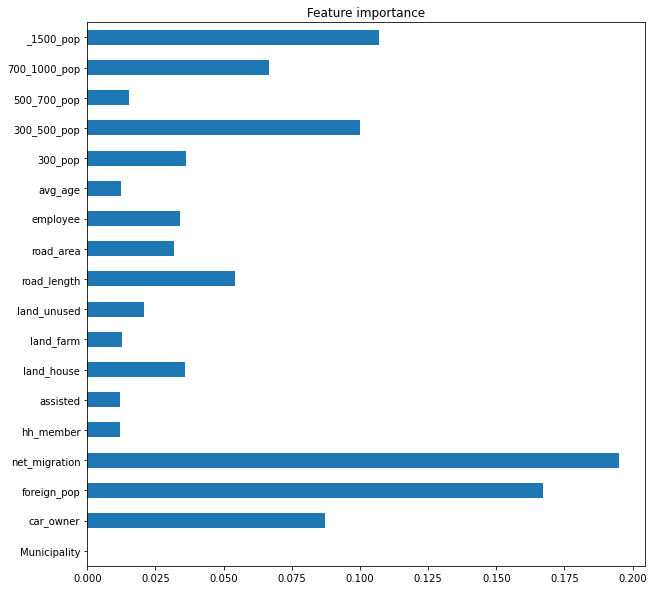

In [64]:
# Municipality only, random forest regression

seed = 0

y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [65]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

[-0.02286617 -0.08112919 -0.60920695 -1.57775677 -0.16263411]
-0.49 accuracy with a standard deviation of 0.58


R² of Random Forest Regressor on training set: 0.865
R² of Random Forest Regressor on test set: -0.036


<AxesSubplot:title={'center':'Feature importance'}>

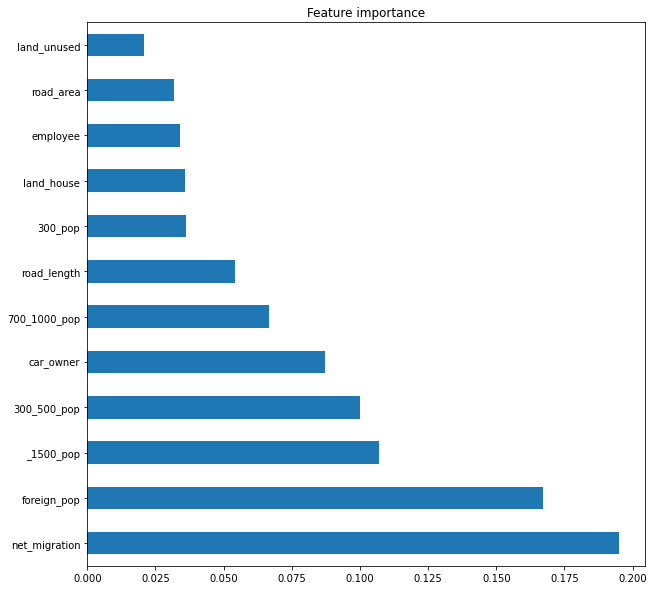

In [66]:
# Apply standard scaler to test the performance change
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.nlargest(12).plot.barh(figsize=(10,10), title="Feature importance")

R² of Random Forest Regressor on training set: 0.879
R² of Random Forest Regressor on test set: -0.079


<AxesSubplot:title={'center':'Feature importance'}>

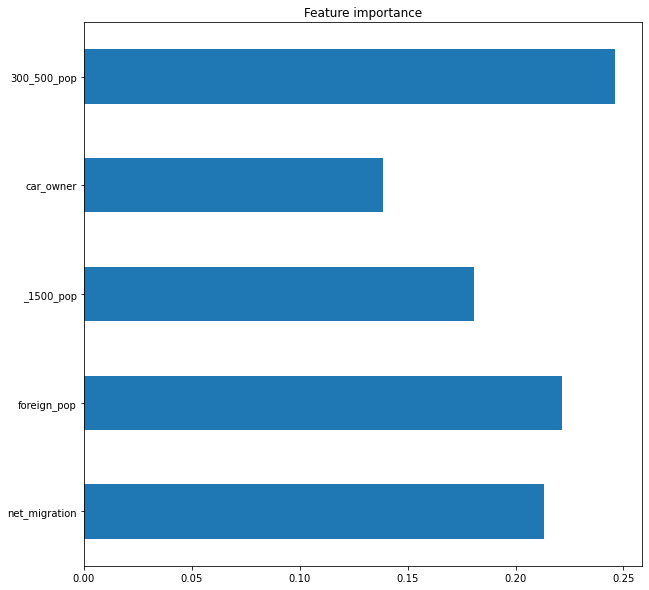

In [67]:
# Use best features to test the performance change
labels_top5 =["net_migration", "foreign_pop", "_1500_pop","car_owner", "300_500_pop"]

X = dataset_reg[labels_top5]
                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels_top5)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [68]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

[-1.75579856e-01 -9.91879870e-02  4.07257989e-04 -1.43292081e+00
  3.83580448e-02]
-0.33 accuracy with a standard deviation of 0.55


Randome forest regression with municipality data did not work presumably because data population of 23 is too small. Thus, We tried to increase the datasize by including other cities in Tokyo. The data population became 49, which is still too small though.

<AxesSubplot:>

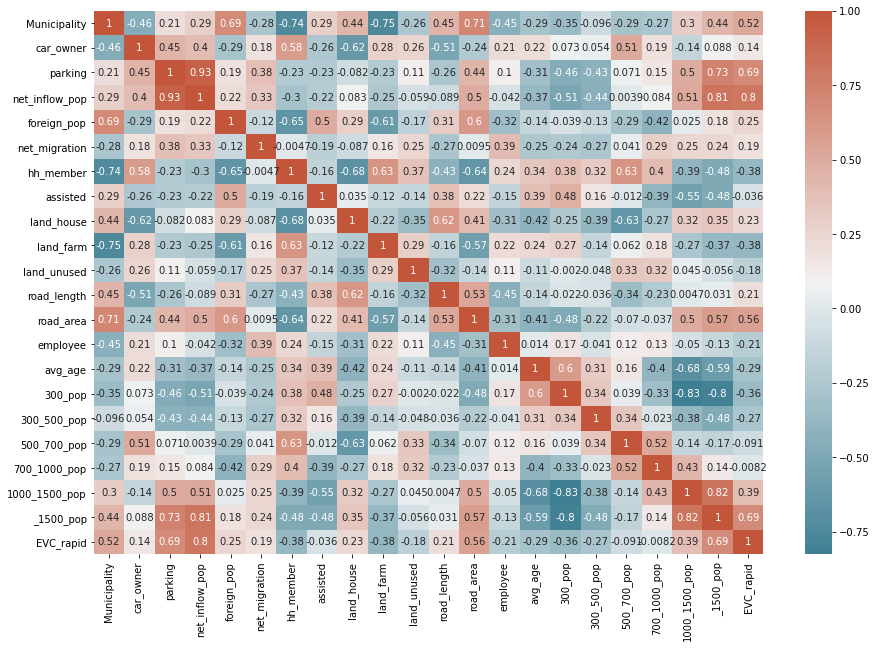

In [69]:
X_tokyo = pd.read_csv(path+"X_tokyo_enhance.csv", nrows=49)

X_tokyo.iloc[:, 1:25] = X_tokyo.iloc[:, 1:25] .replace(',', '', regex=True).astype(float)

# Population weighting for population-driven data
X_tokyo["car_owner"] = X_tokyo["car_owner"]/X_tokyo["total_pop"]
X_tokyo["parking"] = X_tokyo["parking"]/X_tokyo["total_pop"]
X_tokyo["net_inflow_pop"] = X_tokyo["net_inflow_pop"]/X_tokyo["total_pop"]
X_tokyo["foreign_pop"] = X_tokyo["foreign_pop"]/X_tokyo["total_pop"]
X_tokyo["net_migration"] = X_tokyo["net_migration"]/X_tokyo["total_pop"]
X_tokyo["assisted"] = X_tokyo["assisted"]/X_tokyo["total_pop"]

# Land area weighting for land-use data
X_tokyo["land_house"] = X_tokyo["land_house"]/X_tokyo["land_total"]
X_tokyo["land_farm"] = X_tokyo["land_farm"]/X_tokyo["land_total"]
X_tokyo["land_unused"] = X_tokyo["land_unused"]/X_tokyo["land_total"]
X_tokyo["road_length"] = X_tokyo["road_length"]/X_tokyo["land_total"]
X_tokyo["road_area"] = X_tokyo["road_area"]/X_tokyo["land_total"]

# Income population weighting for income range population data
X_tokyo["300_pop"] = X_tokyo["300_pop"]/X_tokyo["total_income_pop"]
X_tokyo["300_500_pop"] = X_tokyo["300_500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["500_700_pop"] = X_tokyo["500_700_pop"]/X_tokyo["total_income_pop"]
X_tokyo["700_1000_pop"] = X_tokyo["700_1000_pop"]/X_tokyo["total_income_pop"]
X_tokyo["1000_1500_pop"] = X_tokyo["1000_1500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["_1500_pop"] = X_tokyo["_1500_pop"]/X_tokyo["total_income_pop"]

dataset = X_tokyo.merge(grouped_EVC, on='CITY_ENG', how='left')
dataset['EVC_rapid'] = dataset['EVC_rapid'].fillna(0)

# Population weighting for y variable
dataset['EVC_rapid'] = dataset['EVC_rapid'] /dataset["total_pop"] # hard to interpret

# Delete unnecessary columns
dataset = dataset.drop(columns=["CITY_ENG", "total_pop", "land_total", "total_income_pop"])

# Making a correlation heatmap & a pairwise plot
corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


R² of Random Forest Regressor on training set: 0.884
R² of Random Forest Regressor on test set: 0.340


<AxesSubplot:title={'center':'Feature importance'}>

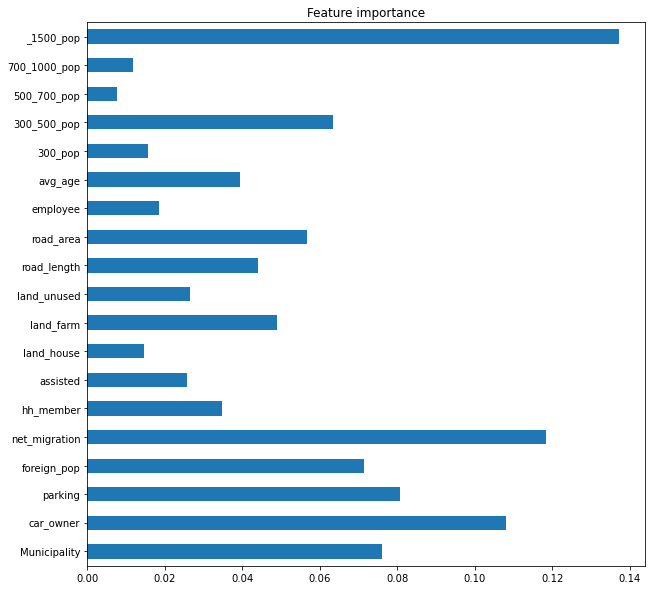

In [70]:
# Drop highly correlated variables to avoid multi-collinearity
drop_columns = ["net_inflow_pop","1000_1500_pop"]
dataset_reg = dataset.drop(columns=drop_columns)

labels = ["Municipality", "car_owner", "parking", 'foreign_pop', 'net_migration', 'hh_member',"assisted", "land_house",'land_farm','land_unused', 'road_length', "road_area", 'employee', "avg_age", "300_pop", "300_500_pop", "500_700_pop", "700_1000_pop", "_1500_pop"]

y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [71]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

[ 0.31613668 -0.12439277 -1.11410543  0.33635195 -0.05448593]
-0.13 accuracy with a standard deviation of 0.53


R² of Random Forest Regressor on training set: 0.884
R² of Random Forest Regressor on test set: 0.340


<AxesSubplot:title={'center':'Feature importance'}>

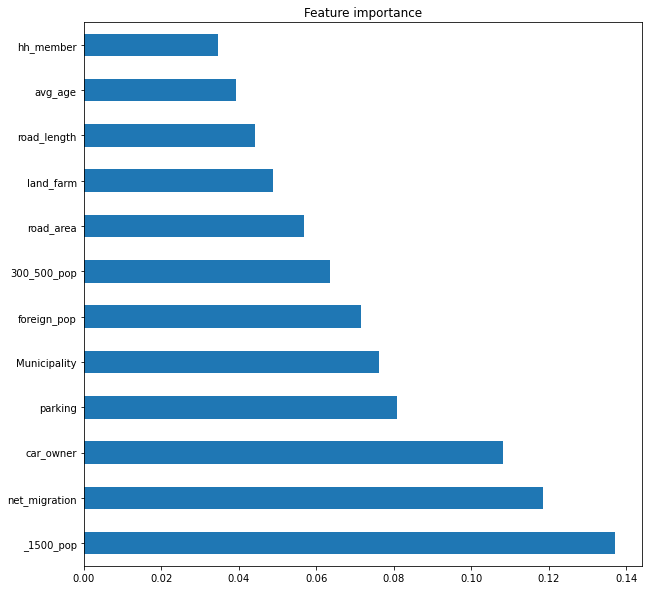

In [72]:
# Apply standard scaler to test the performance change
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.nlargest(12).plot.barh(figsize=(10,10), title="Feature importance")

R² of Random Forest Regressor on training set: 0.865
R² of Random Forest Regressor on test set: -0.542


<AxesSubplot:title={'center':'Feature importance'}>

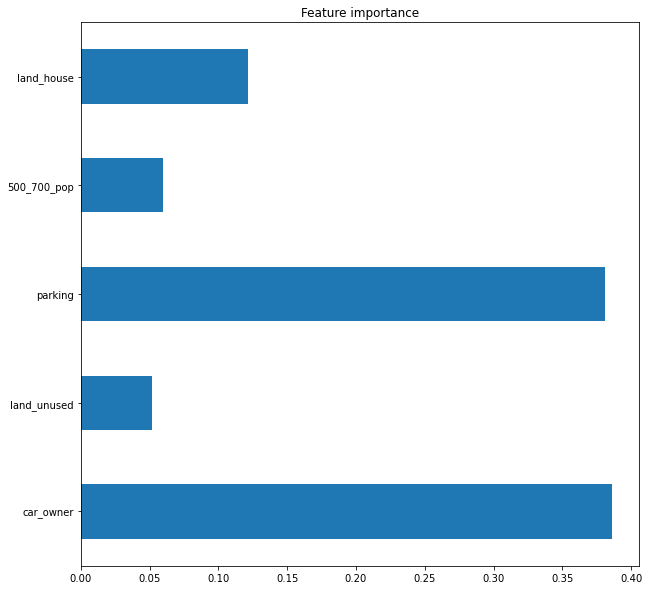

In [73]:
# Use best features to test the performance change
labels_top5 =["car_owner", "land_unused", "parking","500_700_pop", "land_house"]

X = dataset_reg[labels_top5]
                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels_top5)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [74]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

[-0.40159874 -0.70524678 -1.61174215 -0.74584337  0.04540204]
-0.68 accuracy with a standard deviation of 0.54


Random forest regression did not work again due to lack of data. Interestingly, the important features changed. Since, unused land areas are tiny in municipality areas, we suspect including city area data may ruin the data qualities. Then, we tried to use census boundaries, which is smaller than municipality and city boundaries, to increase the data population to maintain data quality.

In [75]:
# Import granular census level boundary data.
tokyo_detail = gpd.read_file(path+"N03-23_13_230101.geojson", encoding='UTF-8')

tokyo_detail["N03_007"] = tokyo_detail["N03_007"].str.strip()
tokyo_detail["N03_007"]= pd.to_numeric(tokyo_detail["N03_007"], errors="coerce")
tokyo_detail = tokyo_detail[tokyo_detail["N03_007"].between(13101, 13229)]

# 146 raws 

tokyo_detail = gpd.GeoDataFrame(tokyo_detail)
tokyo_detail.set_geometry("geometry", inplace=True) 

# Drop unnecesary columns
tokyo_detail = tokyo_detail.drop(columns=["N03_001", "N03_002" ,"N03_003","N03_004"])

In [76]:
# Geoenrich as information as possible

analysis_variables = [
    "KeyFacts.TOTPOP_CY", # 2022 Total population
    "basicFactsForMobileApps.D0034", # 2015 Average age
    "basicFactsForMobileApps.D0035", # 2015 Total non-Japanese population
    "KeyGlobalFacts.AVGHHSZ", # Average household size
    "basicFactsForMobileApps.POP65PLUS", # % Senior +65
    "PopulationTotalsEsriJapan.D0035", # % Household owned house
    "basicFactsForMobileApps.AVGHINC_CY", # Average household income
    "basicFactsForMobileApps.GRWTHRATE_CYFY", # 2015-2020 population growth rate
    "basicFactsForMobileApps.PRIVHHS_OOH_P", # % Household owned house
    "KeyFacts.POPDENS_CY", # 2022 Population density
    "KeyFacts.PP_CY", # 2022 Purchasing power total
    "HouseholdsbySavingsEsriJapan.S0002", # 2018 Average savings per household
    "HouseholdsbyIncomeEsriJapan.I0006",# 2018 Households with income >15 million yen
    "EducationalAttainmentEsriJapan.P0402", # 2010 Bachelor or more degree (age +15)
    "FoodEsriJapan.C0241", # 2018 Dining out spending
    "Spending.CS01_CY", # 2022 Food & bevarage spending total
    "Employment.UNEMP_CY", # 2021 Unemployed population
    "KeyFacts.MRST02_CY" # 2022 Married households
]

In [77]:
sedf = GeoAccessor.from_geodataframe(tokyo_detail)
#enriched_data = cntry.enrich(study_areas=sedf, enrich_variables=analysis_variables)
#enrich_tokyo_fl = enriched_data.spatial.to_featurelayer(title ='enrich_tokyo', gis=gis, tags="FinalProject") 

enrich_tokyo_fl =  'https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/a2050b/FeatureServer'
item = FeatureLayerCollection(enrich_tokyo_fl, gis=gis)
enrich_tokyo = pd.DataFrame.spatial.from_layer(item.layers[0]) # using the first layer in this service
enrich_tokyo # 146 data!

Exception: You do not have permissions to access this resource or perform this operation.
You do not have permissions to access this resource or perform this operation.
(Error Code: 403)

In [ ]:
# Drop rows where has_data is equal to 0
enrich_tokyo= enrich_tokyo[enrich_tokyo["has_data"] != 0]

# Count the number of non-zero cells
enrich_tokyo.applymap(lambda x: x != 0).sum()

Unfortunately, we only got 52 data population with 11 variabales after geoenrichment, indicating that it is not enough for machine learning even if we include census polygons from both municipalities and cities. At the end of the day, we decided to go back to only-municipality data and do OLS regression to find appropriate variables for weighting demand points.